#**EDA**

En este documento se desglosa el análisis exploratorio de datos correspondiente al problema relacionado de los accidentes viales en la Ciudad de Buenos Aires, los datos ya han sido debidamente limpiados y tratados. Lo que se hará aquí es el estudio detallado de los valores faltantes, outliers y tendencias que pueden llegar a ser relevantes en el posterior análisis de la problemática y los KPI's.


In [ ]:
#Importo librerias
import pandas as pd
import numpy as np
import random

In [ ]:
#Leo los archivos csv
Hechos = pd.read_csv('Hechos_EDA.csv', encoding='utf-8', sep=';')

Victimas=pd.read_csv('Victimas_EDA.csv', encoding='utf-8', sep=';')


#**VALORES FALTANTES**

Para empezar analizaremos los datos que nos faltan y veremos si los podemos obtener de alguna forma o si no son relevantes para nuestro análisis.

Exploremos la columna de Hechos:

In [ ]:
Hechos.head(5)

,ID,N_VICTIMAS,AÑO,MES,HORA,LUGAR_DEL_HECHO,TIPO_DE_ENCUENTRO,COMUNA,X,Y,VICTIMA,ACUSADO,BARRIO
0,2016-0001,1,2016,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,CRUCE,8,-58.475340,-34.687570,MOTO,AUTO,VILLA RIACHUELO
1,2016-0002,1,2016,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,CRUCE,9,-58.508775,-34.669777,AUTO,PASAJEROS,NO DATA
2,2016-0003,1,2016,1,7,AV ENTRE RIOS 2034,ENTRE CALLE,1,-58.390403,-34.631894,MOTO,AUTO,CONSTITUCION
3,2016-0004,1,2016,1,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,CRUCE,8,-58.465039,-34.680930,MOTO,NO DATA,VILLA LUGANO
4,2016-0005,1,2016,1,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,CRUCE,1,-58.387183,-34.622466,MOTO,PASAJEROS,CONSTITUCION


En el ETL se observó que hay pocos datos que faltan, sin embargo no se estudio en qué proporción nos afecta dicha carencia de datos. Estudiemos las columnas de coordenadas:

In [ ]:
print(Hechos['Y'].drop_duplicates().sort_values())

17    -34.705250
22    -34.698438
372   -34.696402
249   -34.693741
425   -34.691568
         ...    
435   -34.540486
463   -34.538257
32    -34.534769
490   -34.534654
38           NaN
Name: Y, Length: 605, dtype: float64


In [ ]:
print(Hechos['X'].drop_duplicates().sort_values())

400   -58.529942
664   -58.529337
76    -58.529329
662   -58.529311
57    -58.529280
         ...    
113   -58.359750
170   -58.358815
543   -58.357912
508   -58.356082
38           NaN
Name: X, Length: 605, dtype: float64


Como se puede observar las dos coordenadas tienen elementos NaN, veamos qué porcentaje representan.

In [ ]:
Hechos['X'].fillna('NO DATA',inplace=True)

print(f"El porcentaje de datos faltantes es: {(Hechos[Hechos['X']=='NO DATA'].shape[0]/Hechos.shape[0])*100}%")

El porcentaje de datos faltantes es: 1.7241379310344827%


In [ ]:
Hechos['Y'].fillna('NO DATA',inplace=True)

print(f"El porcentaje de datos faltantes es: {(Hechos[Hechos['Y']=='NO DATA'].shape[0]/Hechos.shape[0])*100}%")

El porcentaje de datos faltantes es: 1.7241379310344827%


Como se puede observar en las dos columnas los datos faltantes corresponden al mismo porcentaje:1.72%. Una proporción bastante aceptable y que no afectará significativamente nuestras conclusiones.

Ahora observemos las columnas de 'VICTIMA' y 'ACUSADO':

In [ ]:
print(f"El porcentaje de datos faltantes es:{(Hechos[Hechos['VICTIMA']=='NO DATA'].shape[0])*100/Hechos.shape[0]}%")

El porcentaje de datos faltantes es:1.293103448275862%


In [ ]:
print(f"El porcentaje de datos faltantes es:{(Hechos[Hechos['ACUSADO']=='NO DATA'].shape[0])*100/Hechos.shape[0]}%")

El porcentaje de datos faltantes es:3.3045977011494254%


Los datos están casi completos, los datos faltantes en la parte de los acusados y victimas puede deberse a accidentes en los que no hay un claro culpable, fallas en los semáforos o imprudencias por ambas partes.

Por último veremos la columna de 'BARRIO' que no estaba en el dataset original, fué recopilado de un dataset de poligonos perimetrales y por medio de una función se determinó a qué barrio pertenecian las coordenadas del accidente.

In [ ]:
print(f"El porcentaje de datos faltantes es:{(Hechos[Hechos['BARRIO']=='NO DATA'].shape[0]/Hechos.shape[0])*100}%")

El porcentaje de datos faltantes es:6.17816091954023%


Un 6.18% de los datos aproximadamente, sin embargo esto ocurre principalmente en autopistas como la General Paz donde se separa la Ciudad Autónoma de Buenos Aires y la Provincia de Buenos Aires; por lo tanto el algoritmo no puede determinar con precisión a qué barrio pertenece. De cualquier forma no es de preocupación la falta de un pequeño porcentaje de estos datos.

Ahora estudiemos el Dataset de 'Víctimas' para explorar los datos faltantes.

In [ ]:
Victimas.head(5)

,ID,AÑO,MES,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016,1,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016,1,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016,1,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016,1,CONDUCTOR,MOTO,MASCULINO,29


In [ ]:
print("ROL")
print(f"El porcentaje de datos faltantes es:{(Victimas[Victimas['ROL']=='NO DATA'].shape[0]/Victimas.shape[0])*100}%")
print("VICTIMA")
print(f"El porcentaje de datos faltantes es:{(Victimas[Victimas['VICTIMA']=='NO DATA'].shape[0]/Victimas.shape[0])*100}%")
print("SEXO")
print(f"El porcentaje de datos faltantes es:{(Victimas[Victimas['SEXO']=='NO DATA'].shape[0]/Victimas.shape[0])*100}%")
print("EDAD")
print(f"El porcentaje de datos faltantes es:{(Victimas[Victimas['EDAD']=='NO DATA'].shape[0]/Victimas.shape[0])*100}%")

ROL
El porcentaje de datos faltantes es:1.5341701534170153%
VICTIMA
El porcentaje de datos faltantes es:1.2552301255230125%
SEXO
El porcentaje de datos faltantes es:0.8368200836820083%
EDAD
El porcentaje de datos faltantes es:7.391910739191074%


En este caso trataré de llenar los datos de la edad, en base a la distribución estadística que esta posea; observemos un histograma para aclarar el panorama:

In [ ]:
#Importo la libreria matplotlib
import matplotlib.pyplot as plt


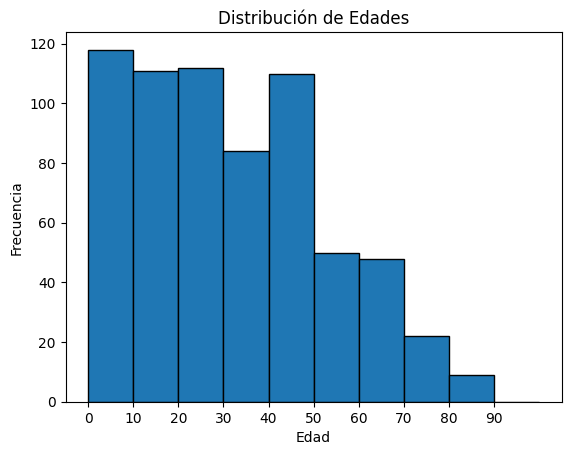

In [ ]:
#Grafico un histograma de edades sin tener en cuenta 'NO DATA'

bins = range(0,110,10)

plt.hist(Victimas[Victimas['EDAD']!='NO DATA']['EDAD'], bins=bins, edgecolor='black')

plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
interval_labels = [f'{bins[i]}' for i in range(len(bins)-1)]
plt.xticks(bins[:-1], interval_labels)

plt.show()

Como podemos observar, la mayor parte de los accidentes fatales le ocurren a la gente menor de 60 años, vamos a calcular qué porcentaje exacto de los datos representa ese sector sin tener en cuenta datos faltantes.

In [ ]:
Victimas_sin_faltantes=Victimas[Victimas['EDAD']!='NO DATA']
Victimas_sin_faltantes['EDAD']=Victimas_sin_faltantes['EDAD'].astype(int)

print(f"{(Victimas_sin_faltantes[Victimas_sin_faltantes['EDAD']<=60].shape[0]/Victimas_sin_faltantes.shape[0])*100}%")

81.32530120481928%


<ipython-input-15-3628a6634332>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Victimas_sin_faltantes['EDAD']=Victimas_sin_faltantes['EDAD'].astype(int)


Se concluye que aproximadamente el 81.33% de los accidentes le ocurren a personas menores de 60 años. Lo que voy a hacer ahora es asignarle un valor aleatorio a los datos faltantes entre 1 y 60 años.

In [ ]:
# Identificar las filas con 'NO DATA'
condicion = (Victimas['EDAD'] == 'NO DATA')

# Obtener la cantidad de 'NO DATA'
num_no_data = sum(condicion)

# Generar números aleatorios solo para las filas con 'NO DATA'
numeros_aleatorios = np.random.randint(1, 61, num_no_data)

# Asignar los números aleatorios a las filas con 'NO DATA'
Victimas.loc[condicion, 'EDAD'] = numeros_aleatorios

Victimas['EDAD']=Victimas['EDAD'].astype(str)


Grafiquemos de nuevo el histograma para observar los cambios:

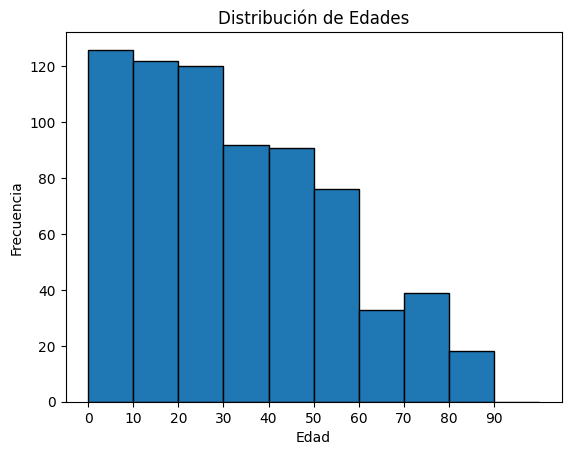

In [ ]:
# Histograma de edades completo

bins = range(0,110,10)

plt.hist(Victimas['EDAD'], bins=bins, edgecolor='black')

plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
interval_labels = [f'{bins[i]}' for i in range(len(bins)-1)]
plt.xticks(bins[:-1], interval_labels)

plt.show()

#**EXPLORACIÓN DE PATRONES**

Ahora vamos a observar que patrones encontramos que puedan ser relevantes en el Dashboard, a continuación se muestra un histograma de los vehículos que más sufren un accidente mortal.

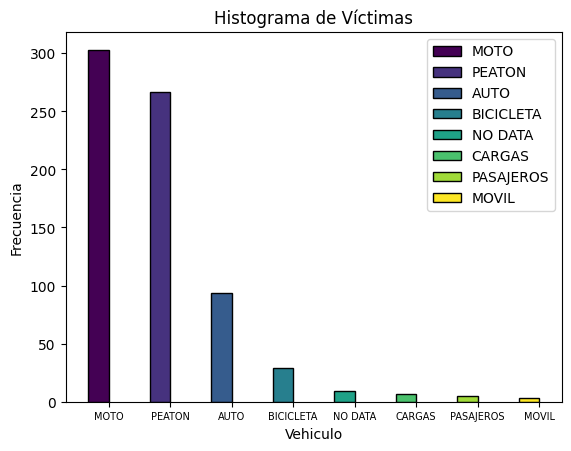

In [ ]:
 # Contar la frecuencia de cada categoría
counts = Victimas['VICTIMA'].value_counts()

# Obtener las categorías y los colores
categories = counts.index
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Configurar el ancho de las barras y el espacio entre ellas
bar_width = 0.4
bar_space = 0.8

# Crear un histograma de barras sin agrupar
fig, ax = plt.subplots()
for i, category in enumerate(categories):
    category_data = Victimas[Victimas['VICTIMA'] == category]
    positions = i * (bar_width + bar_space)
    ax.bar(positions, len(category_data), label=category, color=colors[i], width=bar_width, edgecolor='black')

# Ajustar el tamaño de la letra del eje x
ax.tick_params(axis='x', labelsize=7)

# Añadir etiquetas y título
ax.set_xlabel('Vehiculo')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Víctimas')
ax.set_xticks(np.arange(len(categories)) * (bar_width + bar_space) + (bar_width / 2))
ax.set_xticklabels(categories)
ax.legend()

# Mostrar el histograma
plt.show()

Aquí ya podemos ver un patrón previsible, los motociclistas son las principales víctimas de los accidentes viales seguida de los peatones. Así que nuestro futuro análisis debería enforcarse en atacar estos dos sectores.

Ahora veamos quienes son los principales acusados de estos accidentes.

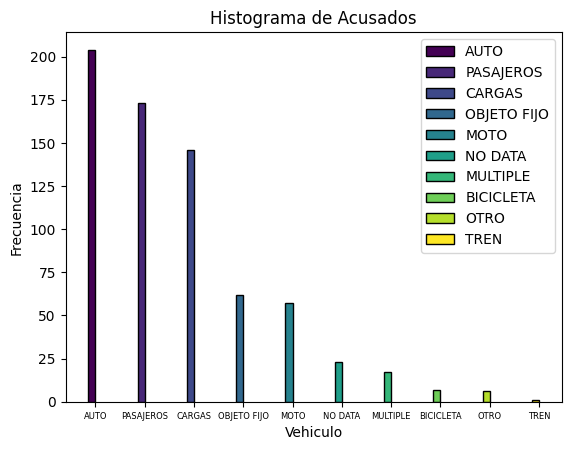

In [ ]:
# Contar la frecuencia de cada categoría
counts = Hechos['ACUSADO'].value_counts()

# Obtener las categorías y los colores
categories = counts.index
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Configurar el ancho de las barras y el espacio entre ellas
bar_width = 0.3
bar_space = 1.8

# Crear un histograma de barras sin agrupar
fig, ax = plt.subplots()
for i, category in enumerate(categories):
    category_data = Hechos[Hechos['ACUSADO'] == category]
    positions = i * (bar_width + bar_space)
    ax.bar(positions, len(category_data), label=category, color=colors[i], width=bar_width, edgecolor='black')

# Ajustar el tamaño de la letra del eje x
ax.tick_params(axis='x', labelsize=6)

# Añadir etiquetas y título
ax.set_xlabel('Vehiculo')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Acusados')
ax.set_xticks(np.arange(len(categories)) * (bar_width + bar_space) + (bar_width / 2))
ax.set_xticklabels(categories)
ax.legend()

# Mostrar el histograma
plt.show()

Se puede ver que los principales causantes de los accidentes viales corresponden a Autos, los mismos pasajeros y a Vechículos con cargas pesadas; seguramente estos sean los tres tipos de acusados que contemplaremos en un posterior análisis. Para finalizar crearemos una columna en el Dataset 'Hechos' en el cual separemos las horas por franja horaria con la siguiente convención:

**Mañana:**De 00 a 12.

**Tarde:** De 12 a 19.

**Noche:** De 19 a 24.

In [ ]:
Hechos['HORA'] = Hechos['HORA'].replace('SD', np.nan)

Hechos['HORA'] = Hechos['HORA'].fillna(-1).astype(int)

Hechos['HORA']=Hechos['HORA'].astype(int)

# Crear la columna 'Franja' basada en la columna 'Hora'
Hechos['FRANJA'] = pd.cut(Hechos['HORA'], bins=[0, 12, 19, 24], labels=['MAÑANA', 'TARDE', 'NOCHE'], include_lowest=True, right=False)


Ahora observemos los datos en un diagrama circular:

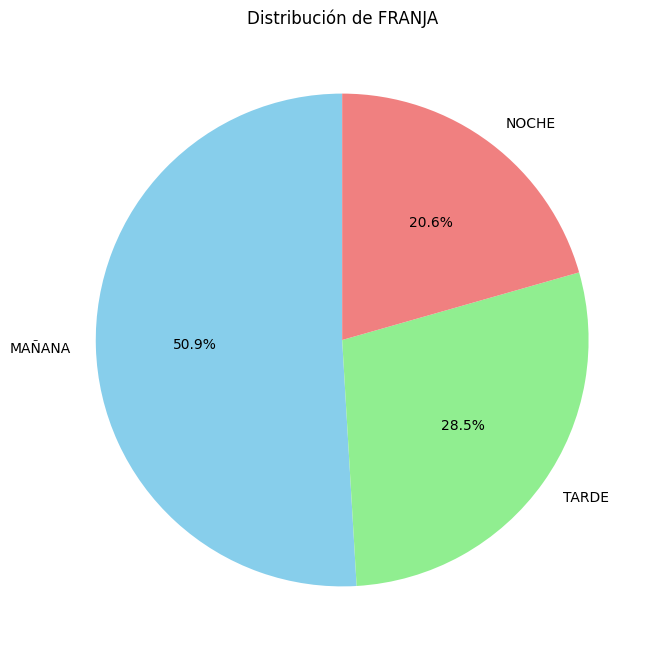

In [ ]:
# Contar la frecuencia de cada valor en la columna 'FRANJA'
conteo_franjas = Hechos['FRANJA'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_franjas, labels=conteo_franjas.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribución de FRANJA')
plt.show()

Se puede contemplar como la mañana es inmensamente superior a las demás franjas horarias, Esto lo tendremos en cuenta en Dashboard y en el análisis. Sin embargo como se denotará en el análisis puede depender del vehículo.

In [ ]:
#Exportamos archivos

Hechos.to_csv('Hechos_clean.csv', index=False, encoding='utf-8-sig',sep=';')
Victimas.to_csv('Victimas_clean.csv', index=False, encoding='utf-8-sig',sep=';')

In [ ]:
from google.colab import files

# Descargar el archivo CSV
files.download('Hechos_clean.csv')
files.download('Victimas_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>